This notebook will present an implementation of DS salary prediction model based on Kaggle dataset

In [1]:
#importing libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset

df = pd.read_csv(r"C:\Users\neckl\ds_salaries.csv")

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Exploratory Data Analysis (EDA)

In [3]:
df.shape

(3755, 11)

In [4]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

We can see that experience levels have 4 catergories, which are:

- SE (Senior level)
- MI (Middle level)
- EN (Entry-level)
- EX (Executive-level)

So we will be counting to see the distribution


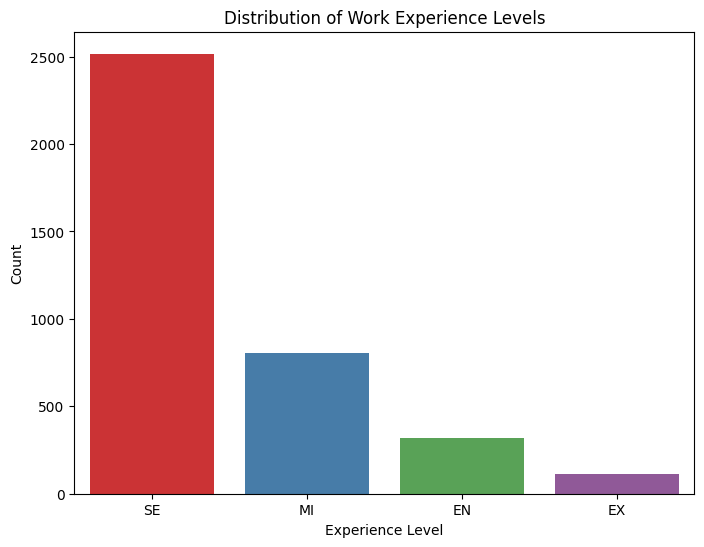

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='experience_level', palette="Set1")
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Work Experience Levels')
plt.show()

Also we can see the average salary per year

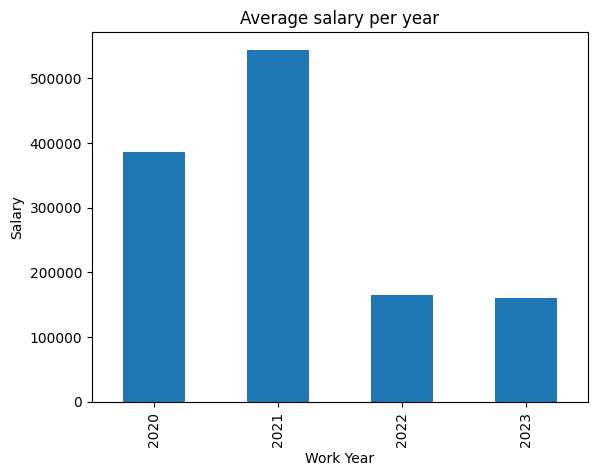

In [10]:
df1 = df.groupby("work_year")["salary"].mean()
df1.plot(kind="bar")
plt.xlabel("Work Year")
plt.ylabel("Salary")
plt.title("Average salary per year")
plt.show()

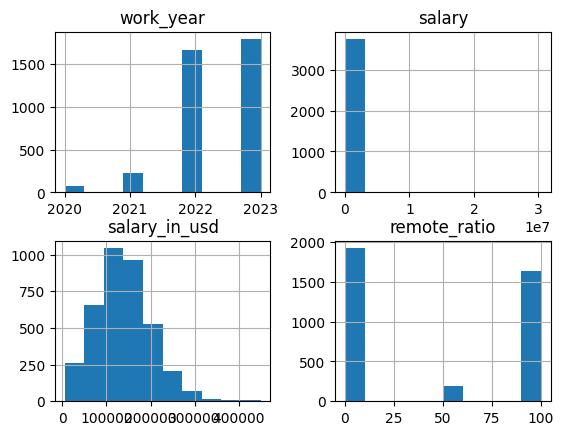

In [11]:
df.hist()
plt.show()

In [12]:
df['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

Below is the the distribution of roles

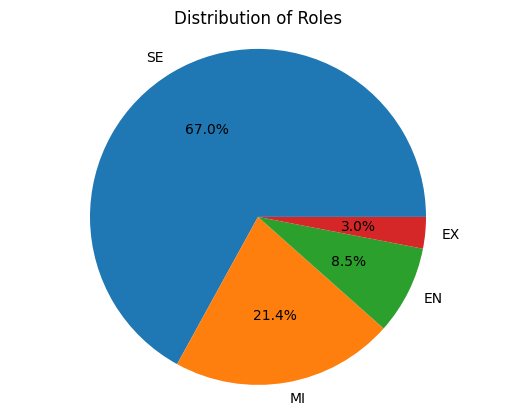

In [13]:
roles = ["SE","MI","EN","EX"]
counts = [2516,805,320,114]

plt.pie(counts, labels=roles, autopct='%1.1f%%')
plt.title('Distribution of Roles')
plt.axis('equal')
plt.show()

In [14]:
df['employment_type'].value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

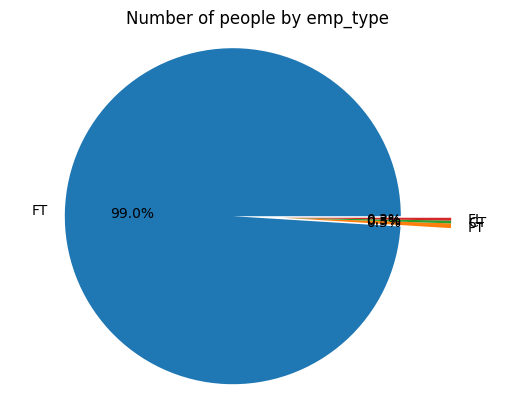

In [15]:
types=["FT","PT","CT","FL"]
no_people=[3718,17,10,10]
plt.pie(no_people, labels=types, autopct='%1.1f%%',explode = [0.3, 0, 0,0])
plt.title('Number of people by emp_type')
plt.axis('equal')
plt.show()

In [16]:
df["company_size"].value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

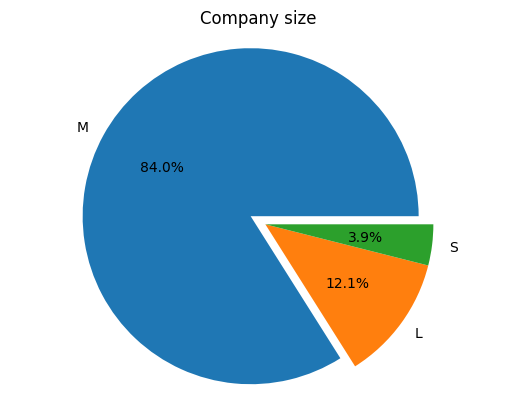

In [17]:
company_numbers = [3153, 454, 148]
company_size = ["M", "L", "S"]
explode = [0.1, 0, 0]  
plt.pie(company_numbers, labels=company_size, explode=explode, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Company size")
plt.show()

In [18]:
df["job_title"].value_counts()


job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

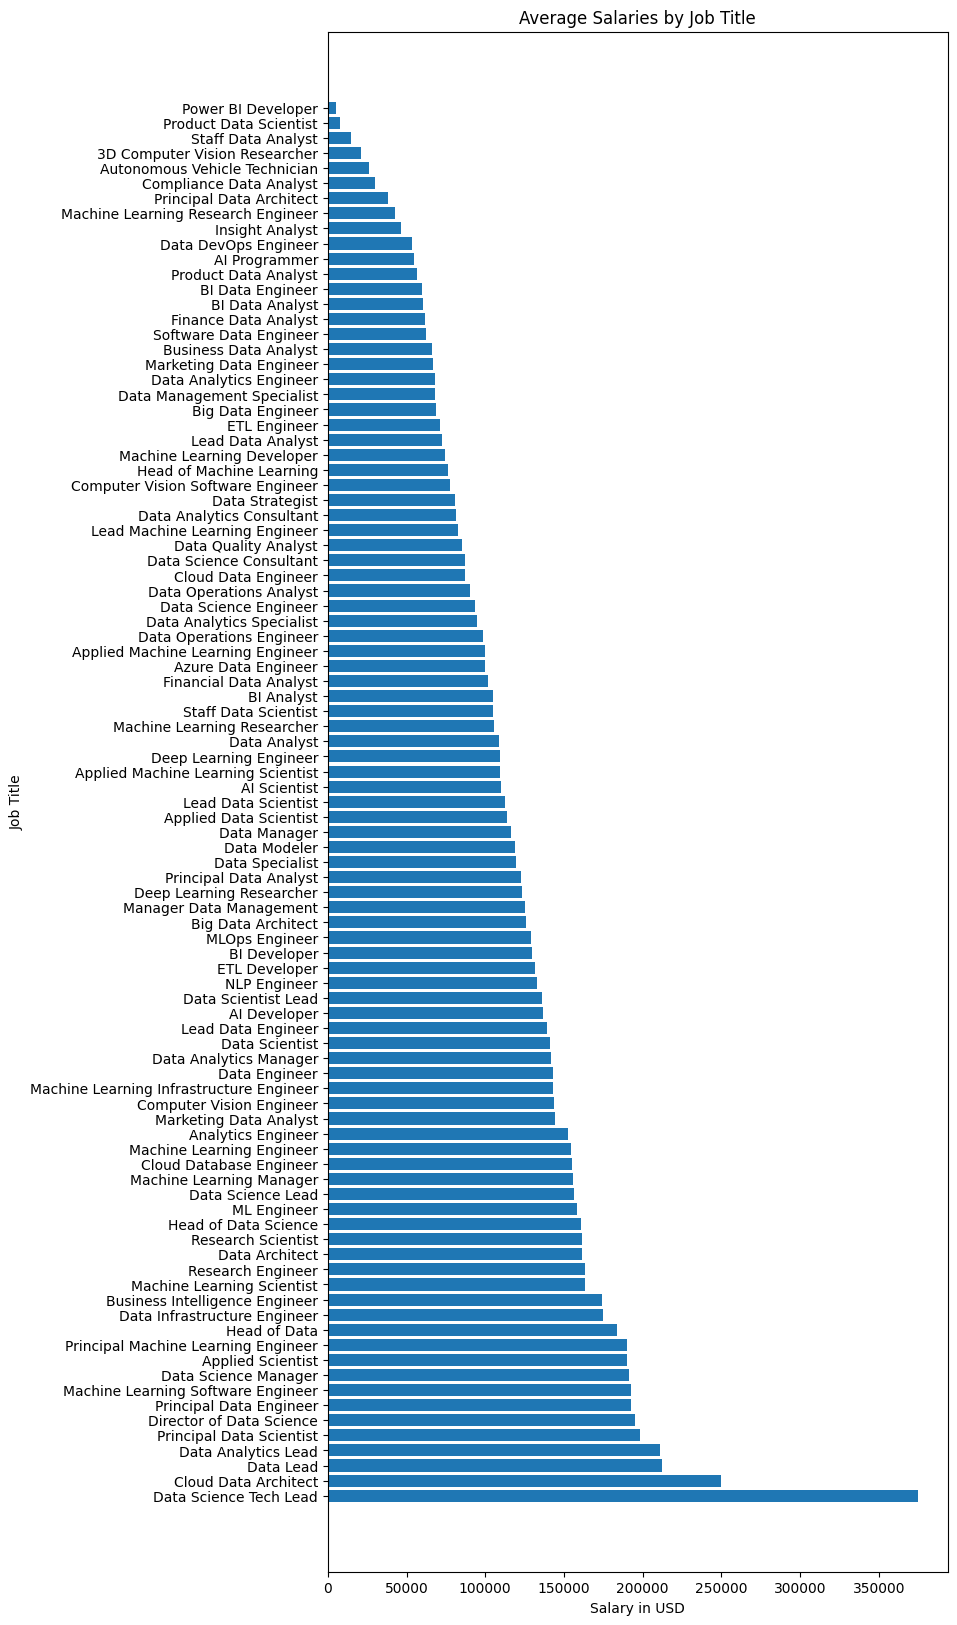

In [19]:
job_title_salaries = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 20))
ax.barh(job_title_salaries.index, job_title_salaries.values)
ax.set_title('Average Salaries by Job Title')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Job Title')
plt.show()

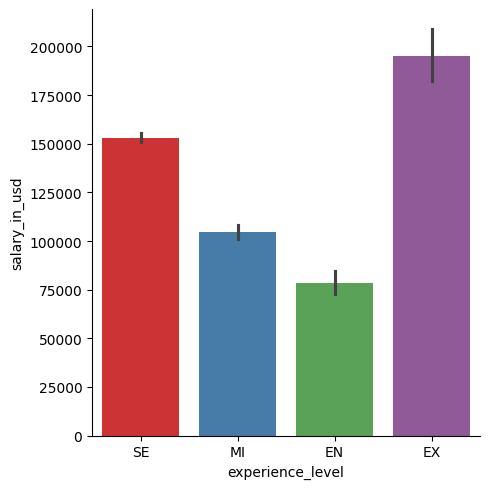

In [20]:
sns.catplot(x="experience_level",y="salary_in_usd" ,kind="bar",data=df, palette="Set1")   
plt.show()

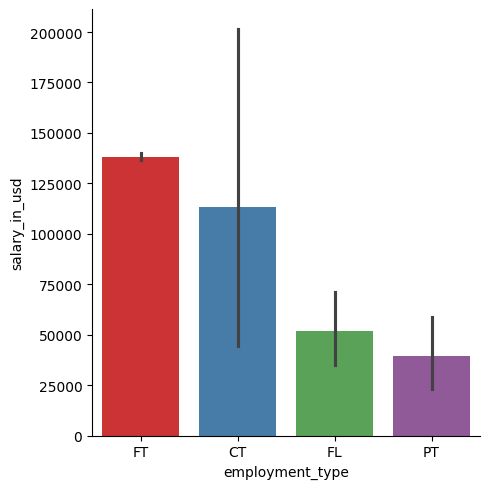

In [21]:

sns.catplot(x="employment_type",y="salary_in_usd" ,kind="bar",data=df, palette="Set1")   
plt.show()

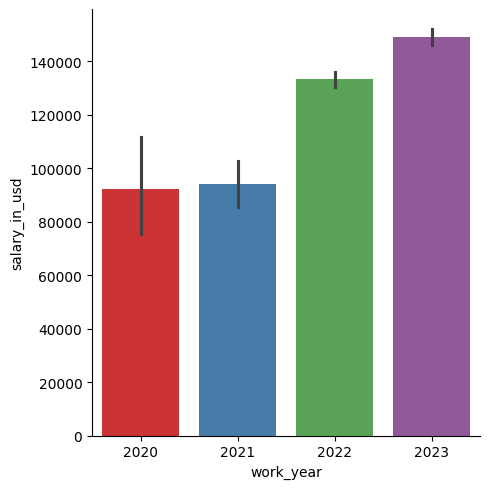

In [24]:
sns.catplot(x="work_year",y="salary_in_usd" ,kind="bar",data=df, palette="Set1")   
plt.show()

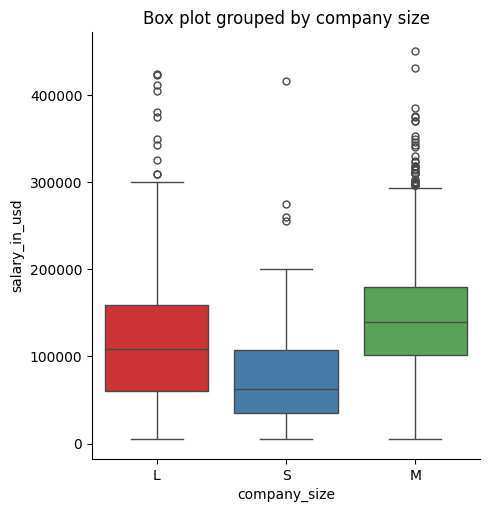

In [25]:
sns.catplot(x="company_size",y="salary_in_usd",kind="box",data=df, palette="Set1")   
plt.title("Box plot grouped by company size")
plt.show()

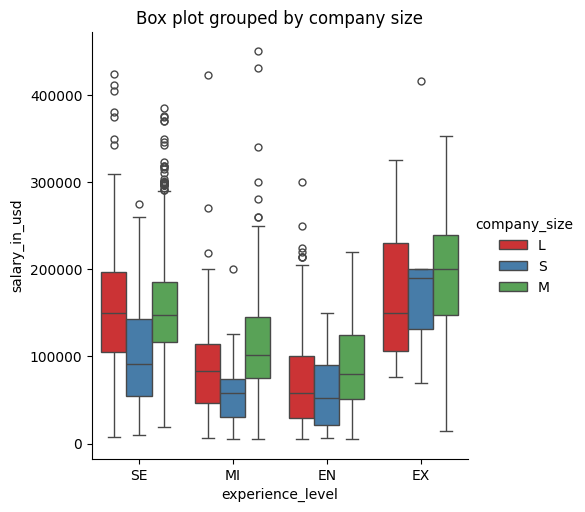

In [26]:
sns.catplot(x="experience_level",y="salary_in_usd",hue="company_size" ,kind="box",data=df,  palette="Set1")   
plt.title("Box plot grouped by company size")
plt.show()

In [27]:
cat_list=[i for i in df.select_dtypes("object")]


In [28]:
cat_list


['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [29]:
for i in cat_list:
    df[i] = df[i].factorize()[0]

In [30]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,0,0,0,80000,0,85847,0,100,0,0
1,2023,1,1,1,30000,1,30000,1,100,1,1
2,2023,1,1,1,25500,1,25500,1,100,1,1
3,2023,0,0,2,175000,1,175000,2,100,2,2
4,2023,0,0,2,120000,1,120000,2,100,2,2
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,0,0,2,412000,1,412000,1,100,1,0
3751,2021,1,0,0,151000,1,151000,1,100,1,0
3752,2020,2,0,2,105000,1,105000,1,100,1,1
3753,2020,2,1,20,100000,1,100000,1,100,1,0


Correlation:

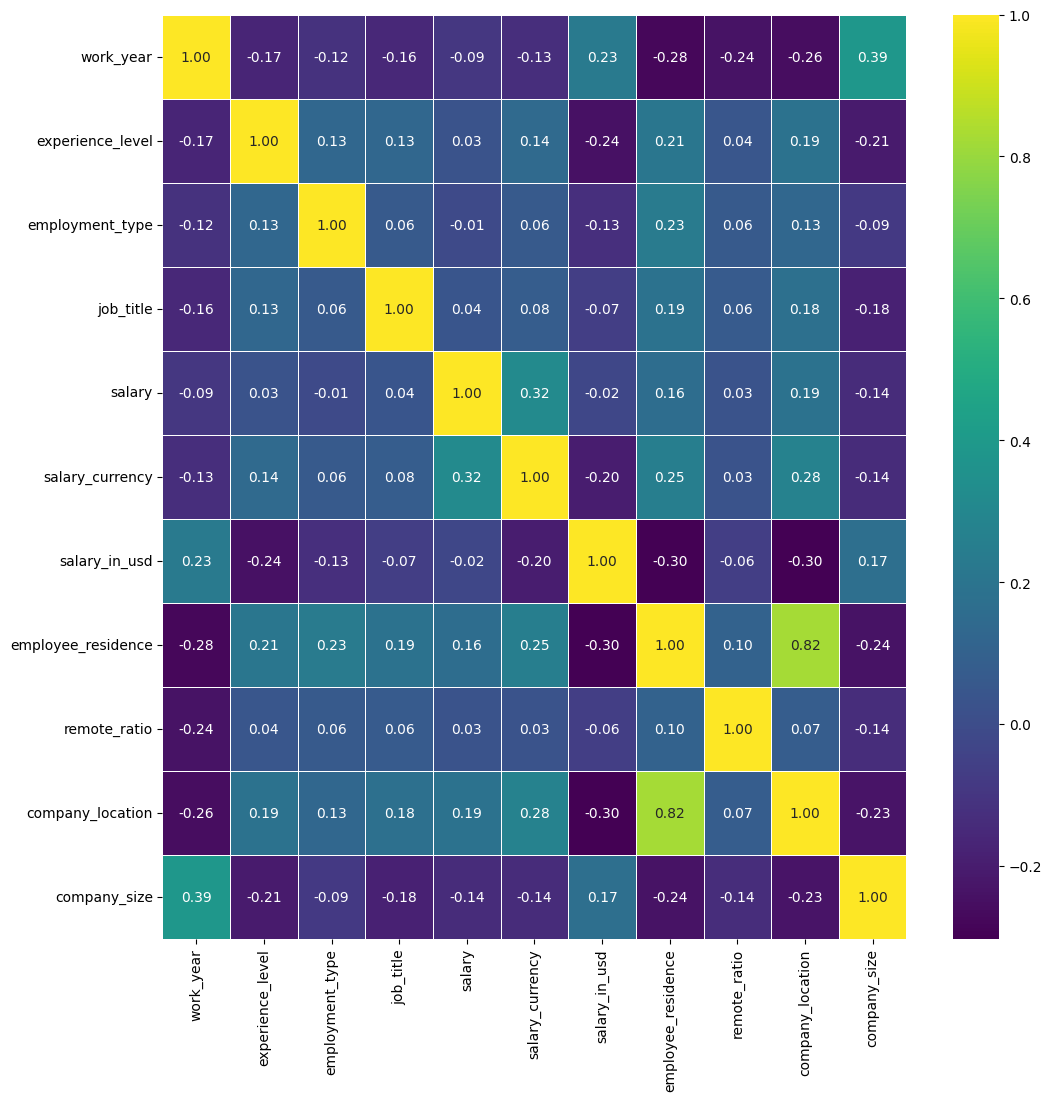

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,cmap="viridis",fmt=".2f")
plt.show()

In [33]:
X=df.drop(["salary_in_usd"], axis=1)
Y=df["salary_in_usd"]

Train-test-split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3004, 10)
(751, 10)
(3004,)
(751,)


Models:

In [37]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [38]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [39]:
y_predict = dt.predict(X_test)

In [40]:
dt.score(X_train,Y_train)


1.0

In [41]:
dt.score(X_test,Y_test)

0.9942920491049599

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
print(r2_score(Y_test, y_predict)*100)
print(mean_squared_error(Y_test, y_predict))
print(mean_absolute_error(Y_test, y_predict))

99.429204910496
22533790.52463382
734.9294274300933


In [44]:
knn=KNeighborsRegressor().fit(X_train,Y_train)
ada=AdaBoostRegressor().fit(X_train,Y_train)
svm=SVR().fit(X_train,Y_train)
ridge=Ridge().fit(X_train,Y_train)
lasso=Lasso().fit(X_train,Y_train)
rf=RandomForestRegressor().fit(X_train,Y_train)
gbm=GradientBoostingRegressor().fit(X_train,Y_train)

In [45]:
models=[ridge,lasso,knn,ada,svm,rf,gbm]

In [46]:
def ML(Y,models):
    y_pred=models.predict(X_test)
    mse=mean_squared_error(Y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
    r2=r2_score(Y_test,y_pred)*100
    
    return mse,rmse,r2

In [47]:
for i in models:
    print("\n",i,"\n\nDifferent models success rate :",ML("salary_in_usd",i))


 Ridge() 

Different models success rate : (3464466548.979132, 58859.71923972397, 12.242882894185215)

 Lasso() 

Different models success rate : (3464396847.135084, 58859.12713534821, 12.244648485742848)

 KNeighborsRegressor() 

Different models success rate : (390614700.0352064, 19763.97480354613, 90.10548392093921)

 AdaBoostRegressor() 

Different models success rate : (115264828.56127638, 10736.145889530208, 97.08026938195889)

 SVR() 

Different models success rate : (3944880838.892905, 62808.28638717112, 0.07368671254132098)

 RandomForestRegressor() 

Different models success rate : (22422089.102287352, 4735.196838811175, 99.43203437779296)

 GradientBoostingRegressor() 

Different models success rate : (16414025.498781446, 4051.422651215428, 99.58422240841122)
